# YOHO training

In [4]:
# Automatically reload modules before entering the execution of code typed at 
# the IPython prompt
%load_ext autoreload
%autoreload 2

In [2]:
# Import used libraries

import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import librosa
import torch

torch.manual_seed(0)

print(f"{pd.__name__} version: {pd.__version__}")
print(f"{matplotlib.__name__} version: {matplotlib.__version__}")
print(f"{librosa.__name__} version: {librosa.__version__}")
print(f"{torch.__name__} version: {torch.__version__}")


from yoho24.utils import AudioClip, AudioFile, TUTDataset, YOHODataGenerator

pandas version: 2.1.2
matplotlib version: 3.8.3
librosa version: 0.10.2.post1
torch version: 2.1.1


In [3]:
def plot_melspectrogram(
    audio: AudioFile,
    n_mels: int = 40,
    win_len: float = 1.00,
    hop_len: float = 1.00,
):
    """
    Plots the Mel spectrogram.
    """
    plt.figure(figsize=(10, 4))
    plt.title(f"Mel spectrogram")
    librosa.display.specshow(
        data=audio.mel_spectrogram(
            n_mels=n_mels, win_len=win_len, hop_len=hop_len
        ),
        sr=audio.sr,
        x_axis="frames",
        y_axis="mel",
    )
    plt.colorbar(format="%+2.0f dB")
    plt.tight_layout()
    plt.show()

## Data generator

In [6]:
N_MELS = 40
WIN_S = 0.04 # 40 ms
HOP_S = 0.01 # 10 ms

In [5]:
audios = [
    AudioFile(filepath=file.filepath, labels=eval(file.events))
    for _, file in pd.read_csv(
        "./data/processed/TUT/TUT-sound-events-2017-development.csv"
    ).iterrows()
]

audioclips = [
    audioclip
    for _, audio in enumerate(audios)
    for audioclip in audio.subdivide(win_len=2.56, hop_len=1.96)
    if _ < 1
]

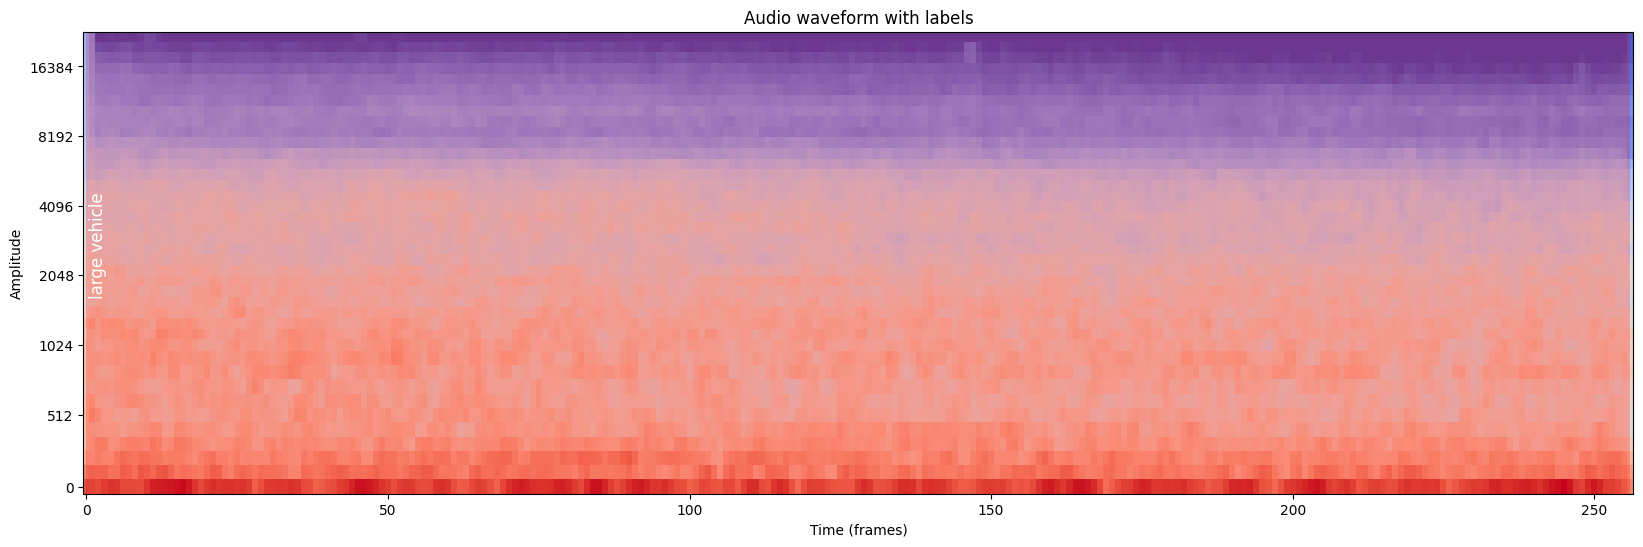

In [7]:
audioclips[25].plot_labels()

In [8]:
N_MELS = 40
HOP_MS = 10
WIN_MS = 40

tut_train = TUTDataset(
    audios=audioclips,
)

print(f"Number of audio files: {len(tut_train)}")
print(f"Duration: {tut_train.audios[0].duration} seconds")
print(f"Sampling rate: {tut_train.audios[0].sr} Hz")

Number of audio files: 122
Duration: 2.56 seconds
Sampling rate: 44100 Hz


In [9]:
train_dataloader = YOHODataGenerator(tut_train, batch_size=4, shuffle=True)

train_features, train_labels = next(iter(train_dataloader))

print(f"Train features shape: {train_features.shape}")
print(f"Train labels shape: {train_labels.shape}")

Train features shape: torch.Size([4, 1, 40, 257])
Train labels shape: torch.Size([4, 9, 18])


In [51]:
from yoho24.yoho import YOHO

random_input = torch.randn(4, 1, 64, 801)

model = YOHO(input_shape=(4, 1, 64, 801), output_shape=(4, 6, 26))
x = model(random_input)
print(x.shape)

random_input2 = torch.randn(8, 1, 40, 257)

model2 = YOHO(input_shape=(8, 1, 40, 257), output_shape=(8, 9, 18))
x2 = model2(random_input2)
print(x2.shape)

torch.Size([4, 6, 26])
torch.Size([8, 9, 9])


In [ ]:
from torchsummary import summary

summary(
    YOHO(input_shape=(4, 1, 64, 801), output_shape=(4, 1, 6, 26)),
    input_size=(1, 64, 801),
    batch_size=4,
)

In [12]:
x = torch.randn(128, 2, 26)
x.view(-1, 256).shape

torch.Size([26, 256])